In [3]:
import os
import glob
import json
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

# get location of pf-ci json files
#pfci_file_location = os.path.join('/Users/rmandern/code/data_repository/Mapol/OHminus', 'qed-fci', '*.json')
#pcqed_file_location = os.path.join('/Users/rmandern/code/data_repository/Mapol/OHminus', 'pcqed_data', '*.json')
pfci_file_location = os.path.join('/Users/jfoley19/Code/data_repository/Mapol/OHminus', 'qed-fci', '*.json')
pcqed_file_location = os.path.join('/Users/jfoley19/Code/data_repository/Mapol/OHminus', 'pcqed_data', '*.json')
# get pf-ci file names
pfci_filenames = glob.glob(pfci_file_location)
pcqed_filenames = glob.glob(pcqed_file_location)

# get number of the pf-ci json files
n_files = len(pfci_filenames)

n_files_2 = len(pcqed_filenames)

print(pcqed_filenames[0])
print(pcqed_filenames[1])
print(pcqed_filenames[2])

pcqed_data = json.load(open(pcqed_filenames[2]))



/Users/jfoley19/Code/data_repository/Mapol/OHminus/pcqed_data/OH-_6-31G_PCQED_Origin_Dependence_20_ang_0.21927747.json
/Users/jfoley19/Code/data_repository/Mapol/OHminus/pcqed_data/OH-_6-31G_PCQED_Origin_Dependence_0_ang_0.21927747.json
/Users/jfoley19/Code/data_repository/Mapol/OHminus/pcqed_data/OH-_6-31G_PCQED_0.05_0.21927747.json


In [4]:
photon_count = pcqed_data["model"]['number_of_photon_states']
pcqed_errors = pcqed_data["origin_dependent_error"]
print(photon_count, pcqed_errors)

[2, 3, 5, 9, 17, 33] [1.1973436651193907, 0.8846499098818441, 0.5030561682658288, 0.1517958442292695, 0.003426788843057693, 1.298019469686551e-10]


In [21]:

# create numpy array to hold the number of photonic fock states
pn = np.zeros(n_files)
# create numpy array to hold the displacement error
er = np.zeros(n_files)

# loop over json files
ctr = 0
for f in pfci_filenames:
    # load json file
    data = json.load(open(f))
    # get data field with number of photonic fock states
    n = data["model"]["maximum_photon_occupation_state"]
    # get data field with origin dependent error
    error = data["origin_dependent_error"]
    # store n to numpy array
    pn[ctr] = n+1
    # store error to numpy array
    er[ctr] = error
    # increment counter
    ctr += 1

# find indices sorted from lowest to highest photonic fock state numbers
idx = np.flip(np.argsort(pn))


x_pfci = pn[idx]
y_pfci = er[idx]

x_pcqed = np.flip(np.array(photon_count))
y_pcqed = np.flip(np.array(pcqed_errors))


x_csci = [x_pfci[5]]
y_csci = [4.405364961712621e-13]

#N_p = np.array([3, 5, 7, 9, 11, 13, 15, 17, 33])
#error = np.array([0.8846499098818299,0.5030561682658288,0.28350180325411145,0.15179584422928372,0.0744678498403033,0.03215178125074658,0.011680933216794642,0.0034267888430434823,1.298161578233703e-10])
# N_pc = N_p[idx]
# err = error[idx]

coef_pfci = np.polyfit(x_pfci, y_pfci, 5)

coef_pcqed = np.polyfit(x_pcqed, y_pcqed, 5)

def poly_eval(x_vals, a_vals, order):
    """ Function to evaluate a polynomial  or order 2, 3, or 4 from np.polyfit
        Arguments
        ---------
        x_vals : array of floats
            the x values you want to evaluate the fit on
        a_vals : array of floats
            the coefficient of the polynomial
        order : int
            the order of the polynomial - accepts 2, 3, or 4

    """
    if order==5:
        return a_vals[0] * x_vals ** 5 + a_vals[1] * x_vals ** 4 + a_vals[2] * x_vals ** 3 + a_vals[3] * x_vals ** 2 + a_vals[4] * x_vals ** 1 + a_vals[5]
    elif order==4:
        return a_vals[0] * x_vals ** 4 + a_vals[1] * x_vals ** 3 + a_vals[2] * x_vals ** 2 + a_vals[3] * x_vals ** 1 + a_vals[4]
    elif order==3:
        return a_vals[0] * x_vals ** 3 + a_vals[1] * x_vals ** 2 + a_vals[2] * x_vals ** 1 + a_vals[3]

    elif order==2:
        return a_vals[0] * x_vals ** 2 + a_vals[1] * x_vals ** 1 + a_vals[2] 
    else:
        print(" Specify order = 2, 3, or 4")
        exit()
        

In [17]:
print(x_pfci)
print(y_pfci)
print(x_pcqed)
print(y_pcqed)

print(coef_pfci)

[33. 17.  9.  5.  3.  2.]
[1.27926114e-10 3.44765559e-03 1.51684288e-01 5.02026743e-01
 8.82395980e-01 1.19399398e+00]
[33 17  9  5  3  2]
[1.29801947e-10 3.42678884e-03 1.51795844e-01 5.03056168e-01
 8.84649910e-01 1.19734367e+00]
[-4.75771688e-06  3.39836968e-04 -8.65380665e-03  1.05511108e-01
 -6.95816742e-01  2.22752834e+00]


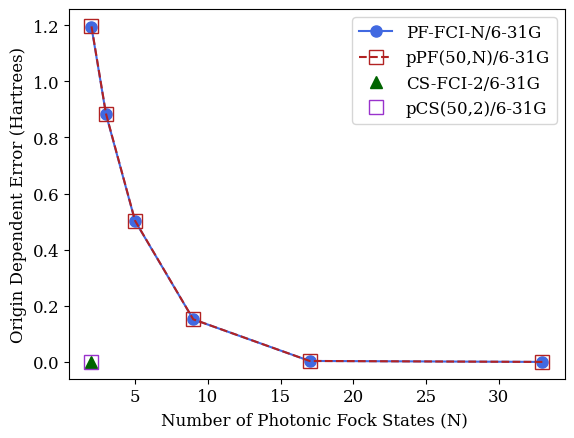

In [33]:
# pfit_pcqed = np.poly1d(pcqed_pfit)
# x_val = np.linspace(min(N_p), max(N_p), 9)
# y_val = pfit_pcqed(x_val)


COLOUR1 = "firebrick"
COLOUR2 = "darkgreen"
COLOUR3 = "royalblue"
COLOUR4 = "rebeccapurple"
COLOUR5 = 'darkorchid'
COLOUR6 = 'olivedrab'

fit_pfci = poly_eval(x_pfci, coef_pfci, 5)
fit_pcqed = poly_eval(x_pcqed, coef_pcqed, 5)

plt.plot(x_pfci, y_pfci, color=COLOUR3, marker="o",  ms="8", label="PF-FCI-N/6-31G" )
plt.plot(x_pcqed,y_pcqed, color=COLOUR1,marker="s",  ms="10", mfc="none", linestyle="dashed", label="pPF(50,N)/6-31G" )
plt.plot(x_csci, y_csci, color=COLOUR2, linestyle="none", marker="^",  ms="8", label="CS-FCI-2/6-31G")
plt.plot(x_csci, y_csci, color=COLOUR5, linestyle="none", marker="s",  ms="10", mfc="none", label="pCS(50,2)/6-31G")
# plt.yscale("log")
plt.legend()
plt.xlabel("Number of Photonic Fock States (N) ")
plt.ylabel("Origin Dependent Error (Hartrees)")
plt.savefig("OH_minus_error_origin_dep.png", dpi=250)
plt.show()
